###Exercise 1

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train.tsv', sep='\t')

# Display the first few rows
print(df.head())


   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  


In [4]:
print(df.info())

# Check for missing values
print(df.isnull().sum())
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB
None
PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64
Sentiment
2    79582
3    32927
1    27273
4     9206
0     7072
Name: count, dtype: int64


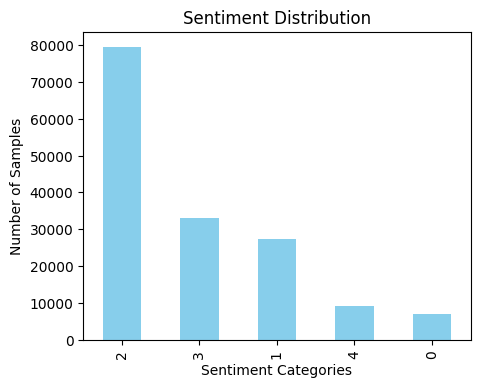

In [13]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
plt.figure(figsize=(5,4))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Categories')
plt.ylabel('Number of Samples')
plt.show()

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Initializing CountVectorizer
vectorizer = CountVectorizer(stop_words='english', token_pattern=r'[a-zA-Z]+')
X_counts = vectorizer.fit_transform(df['Phrase'])

# Show the shape of the document-term matrix
print(X_counts.shape)

(156060, 14839)


In [7]:
from sklearn.model_selection import train_test_split

# Split the data into train and test (30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_counts, df['Sentiment'], test_size=0.3, random_state=42)

# Check the shapes
print(X_train.shape, X_test.shape)

(109242, 14839) (46818, 14839)


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initialize the classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 60.65%


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', token_pattern=r'[a-zA-Z]+')

# Transform the 'Phrase' column into a TF-IDF matrix
X_tfidf = tfidf_vectorizer.fit_transform(df['Phrase'])

# Show the shape of the TF-IDF matrix
print(X_tfidf.shape)

(156060, 14839)


In [10]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, df['Sentiment'], test_size=0.3, random_state=42)

# Check the shapes
print(X_train_tfidf.shape, X_test_tfidf.shape)

(109242, 14839) (46818, 14839)


In [11]:
nb_classifier_tfidf = MultinomialNB()

# Train the model
nb_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Make predictions on the test set
y_pred_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)

# Compute the accuracy
accuracy_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)
print(f'TF-IDF Model Accuracy: {accuracy_tfidf * 100:.2f}%')

TF-IDF Model Accuracy: 58.36%


###Exercise 2


In [15]:
pip install ibm-watson

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 5.8 MB/s eta 0:00:00
  Created wheel for ibm-watson: filename=ibm_watson-8.1.0-py3-none-any.whl size=402519 sha256=c0ecd99b295356e42ae5a2585177c3840b319664e1cb9b59c174e61dbb9760b3
  Stored in directory: /root/.cache/pip/wheels/9c/ec/3d/75dc52e05ee4b84284f9f481ccbb85260985823c6c7083bf16
Successfully built ibm-watson


In [16]:
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_watson.natural_language_understanding_v1 import Features, SentimentOptions
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

# Replace 'your_api_key' and 'your_url' with your actual IBM Cloud API Key and URL
api_key = 'JKPg07-rTRQGKYTd30btLwMHW6foXNHCbX6b8IiVk07y'
url = 'https://api.us-south.natural-language-understanding.watson.cloud.ibm.com/instances/92c2dc7d-b747-4dad-a525-37adef17987c'

# Set up authenticator
authenticator = IAMAuthenticator(api_key)
nlu = NaturalLanguageUnderstandingV1(
    version='2021-08-01',
    authenticator=authenticator
)

nlu.set_service_url(url)

# Example: Analyze sentiment of a single phrase
response = nlu.analyze(
    text="This movie was fantastic, I loved every moment of it!",
    features=Features(sentiment=SentimentOptions())).get_result()

print(response['sentiment'])


{'document': {'score': 0.996772, 'label': 'positive'}}


###Exercise 3


In [31]:
# Install necessary libraries if you haven't already
!pip install transformers torch

import torch
from transformers import pipeline

# Define the article text
article_text = """
Claudine Gay resigned Tuesday as Harvard’s president after weeks of controversy
initially sparked by her testimony at a congressional hearing on antisemitism, and later
focusing on allegations of plagiarism in work she had produced throughout her academic
career. (Gay’s resignation was first reported by the Harvard Crimson.) Plagiarism is a
particularly serious charge in academia: In 2021, the president of the University of South
Carolina, Lt. Gen. Robert L. Caslen Jr., resigned after admitting that he had plagiarized a
commencement speech. Plagiarism includes a broad range of possible offenses, from
improperly placing a citation to claiming credit for another scholar’s research or insight,
and individual institutions develop their own policies for evaluating and responding to
allegations of research misconduct. Gay defended her academic record in an op-ed
published Wednesday in the New York Times, saying that she addressed attribution
issues promptly after learning about them, and that “I have never misrepresented my
research findings, nor have I ever claimed credit for the research of others. Moreover,
the citation errors should not obscure a fundamental truth: I proudly stand by my work
and its impact on the field.
"""

# Load sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Perform sentiment analysis
sentiment_result = sentiment_pipeline(article_text)

# Display the results
for result in sentiment_result:
    print(f"Label: {result['label']}, Score: {result['score']:.4f}")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Label: POSITIVE, Score: 0.8849
